In [2]:
import pandas as pd
import json
#import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

## Load in Files

In [3]:
dfPass = pd.read_csv('all_passing.csv')
dfOffSkill = pd.read_csv('offSkillPlayers.csv')
dfDef = pd.read_csv('all_defense.csv')
dfDraftedBy = pd.read_csv('draftedBy.csv')
dfDraftedBy["draftedYear"] = pd.to_numeric(dfDraftedBy["draftedYear"])

In [66]:
dfDraftedBy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8254 entries, 0 to 8253
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   playerId        8254 non-null   object
 1   draftedBy       8254 non-null   object
 2   draftedOverall  8254 non-null   int64 
 3   round           8254 non-null   int64 
 4   draftedPos      7974 non-null   object
 5   draftedYear     8254 non-null   int64 
 6   nfl_position    3963 non-null   object
dtypes: int64(3), object(4)
memory usage: 451.5+ KB


## Remove rows of inccorrect positions

In [67]:
dfPass.drop(dfPass[dfPass["pos"] != "QB"].index, inplace=True)

In [68]:
defRemove = ["QB", "RB", "OL", "WR", "G", "C", "T", "TE", "LS", "RO","FB","P", "PR","KR"]

for row in defRemove:
    dfDef.drop(dfDef[(dfDef["pos"] == row)].index, inplace=True)

In [69]:
offRemove = ["QB", "SE", "OL","DB", "G", "C", "T", "LB", "DL", "K","P","KR", "UT","CB", "PR","SB"]

for row in offRemove:
    dfOffSkill.drop(dfOffSkill[(dfOffSkill.pos == row)].index, inplace=True)


In [70]:
dfPass

,playerId,year,school_name,conf_abbr,class,pos,g,pass_cmp,pass_att,pass_cmp_pct,...,rush_yds_per_att,rush_td,rec,rec_yds,rec_yds_per_rec,rec_td,scrim_att,scrim_yds,scrim_yds_per_att,scrim_td
0,sam-adkins-1,1974,Wichita State,MVC,NaN,QB,11.0,123.0,240.0,51.3,...,-0.3,1.0,NaN,NaN,NaN,NaN,129.0,-37.0,-0.3,1.0
1,sam-adkins-1,1975,Wichita State,MVC,NaN,QB,11.0,105.0,207.0,50.7,...,1.0,1.0,NaN,NaN,NaN,NaN,107.0,102.0,1.0,1.0
2,sam-adkins-1,1976,Wichita State,MVC,NaN,QB,11.0,108.0,214.0,50.5,...,1.0,5.0,NaN,NaN,NaN,NaN,111.0,106.0,1.0,5.0
3,troy-aikman-1,1984,Oklahoma,Big 8,NaN,QB,12.0,6.0,20.0,30.0,...,1.5,0.0,NaN,NaN,NaN,NaN,12.0,18.0,1.5,0.0
4,troy-aikman-1,1985,Oklahoma,Big 8,NaN,QB,12.0,27.0,47.0,57.4,...,1.9,0.0,NaN,NaN,NaN,NaN,49.0,93.0,1.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3471,eric-zeier-1,1993,Georgia,SEC,NaN,QB,11.0,269.0,425.0,63.3,...,-0.7,1.0,NaN,NaN,NaN,NaN,59.0,-43.0,-0.7,1.0
3472,eric-zeier-1,1994,Georgia,SEC,NaN,QB,11.0,259.0,433.0,59.8,...,2.9,1.0,NaN,NaN,NaN,NaN,21.0,61.0,2.9,1.0
3473,scott-zolak-1,1988,Maryland,ACC,NaN,QB,4.0,12.0,22.0,54.5,...,-5.7,0.0,NaN,NaN,NaN,NaN,3.0,-17.0,-5.7,0.0
3474,scott-zolak-1,1989,Maryland,ACC,NaN,QB,8.0,33.0,69.0,47.8,...,-2.9,0.0,NaN,NaN,NaN,NaN,12.0,-35.0,-2.9,0.0


In [71]:
dfOffSkill

,playerId,year,school_name,conf_abbr,class,pos,g,rush_att,rush_yds,rush_yds_per_att,rush_td,rec,rec_yds,rec_yds_per_rec,rec_td,scrim_att,scrim_yds,scrim_yds_per_att,scrim_td
0,don-abbey-1,1967,Penn State,Ind,NaN,RB,10.0,93.0,386.0,4.2,5.0,10.0,148.0,14.8,4.0,103,534,5.2,9
1,don-abbey-1,1968,Penn State,Ind,NaN,RB,10.0,39.0,164.0,4.2,3.0,1.0,14.0,14.0,0.0,40,178,4.5,3
2,don-abbey-1,1969,Penn State,Ind,NaN,RB,10.0,42.0,228.0,5.4,4.0,2.0,3.0,1.5,0.0,44,231,5.3,4
3,karim-abdul-jabbar-1,1995,UCLA,Pac-10,NaN,RB,12.0,296.0,1571.0,5.3,12.0,20.0,188.0,9.4,1.0,316,1759,5.6,13
4,ameer-abdullah-1,2011,Nebraska,Big Ten,FR,RB,13.0,42.0,150.0,3.6,3.0,1.0,11.0,11.0,0.0,43,161,3.7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21280,keith-zinger-1,2003,LSU,SEC,FR,TE,9.0,NaN,NaN,NaN,NaN,3.0,31.0,10.3,0.0,3,31,10.3,0
21281,keith-zinger-1,2004,LSU,SEC,SO,TE,11.0,NaN,NaN,NaN,NaN,2.0,23.0,11.5,0.0,2,23,11.5,0
21282,keith-zinger-1,2005,LSU,SEC,JR,TE,12.0,NaN,NaN,NaN,NaN,7.0,104.0,14.9,1.0,7,104,14.9,1
21283,keith-zinger-1,2007,LSU,SEC,SR,TE,14.0,NaN,NaN,NaN,NaN,3.0,51.0,17.0,0.0,3,51,17.0,0


In [72]:
dfDef

,playerId,year,school_name,conf_abbr,class,pos,g,tackles_solo,tackles_assists,tackles_total,...,sacks,def_int,def_int_yds,def_int_yds_per_int,def_int_td,pass_defended,fumbles_rec,fumbles_rec_yds,fumbles_rec_td,fumbles_forced
0,mehdi-abdesmad-1,2011,Boston College,ACC,FR,DL,3.0,2.0,1.0,3.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0
1,mehdi-abdesmad-1,2012,Boston College,ACC,SO,DL,NaN,10.0,15.0,25.0,...,0.0,NaN,NaN,NaN,NaN,1.0,1.0,5.0,0.0,1.0
2,mehdi-abdesmad-1,2013,Boston College,ACC,JR,DL,4.0,8.0,8.0,16.0,...,2.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0
3,mehdi-abdesmad-1,2014,Boston College,ACC,SR,DL,2.0,2.0,2.0,4.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0
4,mehdi-abdesmad-1,2015,Boston College,ACC,SR,DL,11.0,35.0,14.0,49.0,...,5.5,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16129,jabari-zuniga-1,2015,Florida,SEC,FR,DL,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16130,jabari-zuniga-1,2016,Florida,SEC,FR,DL,12.0,18.0,7.0,25.0,...,5.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,1.0
16131,jabari-zuniga-1,2017,Florida,SEC,SO,DL,10.0,12.0,22.0,34.0,...,4.0,0.0,0.0,NaN,0.0,0.0,1.0,NaN,NaN,0.0
16132,jabari-zuniga-1,2018,Florida,SEC,JR,DL,12.0,17.0,28.0,45.0,...,6.5,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0


## Create derived fields

In [73]:
def appendPerGameStat(df, stat:str):
    df[stat+"_per_game"] = df[stat]/df["g"]
    return df

In [74]:
offStats = ["pass_cmp", "pass_att","pass_yds", "pass_td", "pass_int", "rush_att", "rush_yds",
         "rush_td", "rec", "rec_td", "scrim_att", "scrim_yds","scrim_td"]

In [75]:
#passing
for stat in offStats:
    dfPass = appendPerGameStat(dfPass, stat)

In [76]:
dfPass.head(10)

,playerId,year,school_name,conf_abbr,class,pos,g,pass_cmp,pass_att,pass_cmp_pct,...,pass_td_per_game,pass_int_per_game,rush_att_per_game,rush_yds_per_game,rush_td_per_game,rec_per_game,rec_td_per_game,scrim_att_per_game,scrim_yds_per_game,scrim_td_per_game
0,sam-adkins-1,1974,Wichita State,MVC,NaN,QB,11.0,123.0,240.0,51.3,...,0.363636,0.909091,11.727273,-3.363636,0.090909,NaN,NaN,11.727273,-3.363636,0.090909
1,sam-adkins-1,1975,Wichita State,MVC,NaN,QB,11.0,105.0,207.0,50.7,...,0.272727,0.272727,9.727273,9.272727,0.090909,NaN,NaN,9.727273,9.272727,0.090909
2,sam-adkins-1,1976,Wichita State,MVC,NaN,QB,11.0,108.0,214.0,50.5,...,0.545455,1.000000,10.090909,9.636364,0.454545,NaN,NaN,10.090909,9.636364,0.454545
3,troy-aikman-1,1984,Oklahoma,Big 8,NaN,QB,12.0,6.0,20.0,30.0,...,0.000000,0.250000,1.000000,1.500000,0.000000,NaN,NaN,1.000000,1.500000,0.000000
4,troy-aikman-1,1985,Oklahoma,Big 8,NaN,QB,12.0,27.0,47.0,57.4,...,0.083333,0.083333,4.083333,7.750000,0.000000,NaN,NaN,4.083333,7.750000,0.000000
5,troy-aikman-1,1987,UCLA,Pac-10,NaN,QB,12.0,178.0,273.0,65.2,...,1.416667,0.666667,6.583333,-7.250000,0.166667,NaN,NaN,6.583333,-7.250000,0.166667
6,troy-aikman-1,1988,UCLA,Pac-10,NaN,QB,12.0,228.0,354.0,64.4,...,2.000000,0.750000,6.500000,6.916667,0.083333,NaN,NaN,6.500000,6.916667,0.083333
7,erik-ainge-1,2004,Tennessee,SEC,FR,QB,9.0,109.0,198.0,55.1,...,1.888889,1.000000,1.777778,-3.222222,0.000000,NaN,NaN,1.777778,-3.222222,0.000000
8,erik-ainge-1,2005,Tennessee,SEC,SO,QB,8.0,66.0,145.0,45.5,...,0.625000,0.875000,3.000000,-8.000000,0.000000,NaN,NaN,3.000000,-8.000000,0.000000
9,erik-ainge-1,2006,Tennessee,SEC,JR,QB,12.0,233.0,348.0,67.0,...,1.583333,0.750000,2.166667,-8.500000,0.083333,NaN,NaN,2.166667,-8.500000,0.083333


In [77]:
#Offensive Skill Positions
for stat in offStats[5:]:
    dfOffSkill = appendPerGameStat(dfOffSkill, stat)

In [78]:
dfOffSkill.head(10)

,playerId,year,school_name,conf_abbr,class,pos,g,rush_att,rush_yds,rush_yds_per_att,...,scrim_yds_per_att,scrim_td,rush_att_per_game,rush_yds_per_game,rush_td_per_game,rec_per_game,rec_td_per_game,scrim_att_per_game,scrim_yds_per_game,scrim_td_per_game
0,don-abbey-1,1967,Penn State,Ind,NaN,RB,10.0,93.0,386.0,4.2,...,5.2,9,9.300000,38.600000,0.500000,1.000000,0.400000,10.300000,53.400000,0.900000
1,don-abbey-1,1968,Penn State,Ind,NaN,RB,10.0,39.0,164.0,4.2,...,4.5,3,3.900000,16.400000,0.300000,0.100000,0.000000,4.000000,17.800000,0.300000
2,don-abbey-1,1969,Penn State,Ind,NaN,RB,10.0,42.0,228.0,5.4,...,5.3,4,4.200000,22.800000,0.400000,0.200000,0.000000,4.400000,23.100000,0.400000
3,karim-abdul-jabbar-1,1995,UCLA,Pac-10,NaN,RB,12.0,296.0,1571.0,5.3,...,5.6,13,24.666667,130.916667,1.000000,1.666667,0.083333,26.333333,146.583333,1.083333
4,ameer-abdullah-1,2011,Nebraska,Big Ten,FR,RB,13.0,42.0,150.0,3.6,...,3.7,3,3.230769,11.538462,0.230769,0.076923,0.000000,3.307692,12.384615,0.230769
5,ameer-abdullah-1,2012,Nebraska,Big Ten,SO,RB,14.0,226.0,1137.0,5.0,...,5.3,10,16.142857,81.214286,0.571429,1.714286,0.142857,17.857143,93.928571,0.714286
6,ameer-abdullah-1,2013,Nebraska,Big Ten,JR,RB,13.0,281.0,1690.0,6.0,...,6.3,11,21.615385,130.000000,0.692308,2.000000,0.153846,23.615385,147.846154,0.846154
7,ameer-abdullah-1,2014,Nebraska,Big Ten,SR,RB,13.0,264.0,1611.0,6.1,...,6.6,22,20.307692,123.923077,1.461538,1.692308,0.230769,22.000000,144.615385,1.692308
9,david-abercrombie-1,1970,Tulane,Ind,NaN,RB,12.0,244.0,1121.0,4.6,...,4.6,10,20.333333,93.416667,0.833333,0.833333,0.000000,21.166667,98.333333,0.833333
10,walter-abercrombie-1,1978,Baylor,SWC,NaN,RB,11.0,114.0,661.0,5.8,...,5.7,4,10.363636,60.090909,0.363636,0.181818,0.000000,10.545455,59.909091,0.363636


In [79]:
defStats = ["tackles_solo", "tackles_assists", "tackles_total", "tackles_loss", 
            "sacks", "def_int","pass_defended","fumbles_rec", "fumbles_forced"]

In [80]:
#Defense
for stat in defStats:
    dfDef = appendPerGameStat(dfDef, stat)

In [81]:
dfDef.head(10)

,playerId,year,school_name,conf_abbr,class,pos,g,tackles_solo,tackles_assists,tackles_total,...,fumbles_forced,tackles_solo_per_game,tackles_assists_per_game,tackles_total_per_game,tackles_loss_per_game,sacks_per_game,def_int_per_game,pass_defended_per_game,fumbles_rec_per_game,fumbles_forced_per_game
0,mehdi-abdesmad-1,2011,Boston College,ACC,FR,DL,3.0,2.0,1.0,3.0,...,0.0,0.666667,0.333333,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
1,mehdi-abdesmad-1,2012,Boston College,ACC,SO,DL,NaN,10.0,15.0,25.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,mehdi-abdesmad-1,2013,Boston College,ACC,JR,DL,4.0,8.0,8.0,16.0,...,0.0,2.000000,2.000000,4.000000,0.875000,0.5,0.000000,0.0,0.0,0.0
3,mehdi-abdesmad-1,2014,Boston College,ACC,SR,DL,2.0,2.0,2.0,4.0,...,0.0,1.000000,1.000000,2.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
4,mehdi-abdesmad-1,2015,Boston College,ACC,SR,DL,11.0,35.0,14.0,49.0,...,0.0,3.181818,1.272727,4.454545,1.363636,0.5,0.000000,0.0,0.0,0.0
5,hamza-abdullah-1,2004,Washington State,Pac-10,SR,DB,11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.090909,NaN,NaN,NaN
6,husain-abdullah-1,2004,Washington State,Pac-10,FR,DB,11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.090909,NaN,NaN,NaN
7,husain-abdullah-1,2005,Washington State,Pac-10,SO,DB,10.0,39.0,15.0,54.0,...,NaN,3.900000,1.500000,5.400000,0.000000,0.0,0.200000,NaN,NaN,NaN
8,husain-abdullah-1,2006,Washington State,Pac-10,JR,DB,12.0,40.0,26.0,66.0,...,NaN,3.333333,2.166667,5.500000,0.208333,0.0,0.250000,NaN,NaN,NaN
9,husain-abdullah-1,2007,Washington State,Pac-10,SR,DB,12.0,54.0,39.0,93.0,...,NaN,4.500000,3.250000,7.750000,0.708333,0.0,0.333333,NaN,NaN,NaN


## Create Career DFs

In [82]:
dfPass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3363 entries, 0 to 3475
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   playerId              3363 non-null   object 
 1   year                  3363 non-null   int64  
 2   school_name           3363 non-null   object 
 3   conf_abbr             3363 non-null   object 
 4   class                 1324 non-null   object 
 5   pos                   3363 non-null   object 
 6   g                     3341 non-null   float64
 7   pass_cmp              3331 non-null   float64
 8   pass_att              3331 non-null   float64
 9   pass_cmp_pct          3329 non-null   float64
 10  pass_yds              3331 non-null   float64
 11  pass_yds_per_att      3329 non-null   float64
 12  adj_pass_yds_per_att  3323 non-null   float64
 13  pass_td               3328 non-null   float64
 14  pass_int              3328 non-null   float64
 15  pass_rating          

In [103]:
dfCareerPass = dfPass.groupby(['playerId', "school_name","conf_abbr"]).agg(
    games=('g', 'sum'),
    pass_comp=('pass_cmp', 'sum'),
    pass_att=('pass_att', 'sum'),
    pass_yds=('pass_yds', 'sum'),
    pass_td=('pass_td', 'sum'),
    pass_int=('pass_int', 'sum'),
    rush_att=('rush_att', 'sum'),
    rush_yds=('rush_yds', 'sum'),
    rush_td=('rush_td', 'sum')
).reset_index()


In [102]:
dfCareerPass

,playerId,school_name,conf_abbr,games,pass_comp,pass_att,pass_yds,avg_pass_yds,pass_td,pass_int,rush_att,rush_yds,rush_td
0,aaron-brooks-1,Virginia,ACC,34.0,357.0,651.0,5118.0,1279.500000,33.0,24.0,199.0,547.0,14.0
1,aaron-murray-1,Georgia,SEC,52.0,921.0,1478.0,13166.0,3291.500000,121.0,41.0,286.0,396.0,16.0
2,aaron-rodgers-1,California,Pac-10,25.0,424.0,665.0,5469.0,2734.500000,43.0,13.0,160.0,336.0,8.0
3,adam-hinds-1,Oklahoma State,Big 8,11.0,37.0,59.0,400.0,400.000000,5.0,5.0,16.0,16.0,1.0
4,aj-derby-1,Arkansas,SEC,5.0,19.0,36.0,178.0,178.000000,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,zach-terrell-1,Western Michigan,MAC,49.0,908.0,1387.0,12100.0,3025.000000,96.0,31.0,277.0,620.0,13.0
1143,zach-wilson-3,Brigham Young,Ind,30.0,566.0,837.0,7652.0,2550.666667,56.0,15.0,212.0,642.0,15.0
1144,zebbie-lethridge-1,Texas Tech,Big 12,22.0,251.0,528.0,3308.0,1654.000000,17.0,10.0,221.0,419.0,12.0
1145,zebbie-lethridge-1,Texas Tech,SWC,22.0,268.0,542.0,3481.0,1740.500000,25.0,12.0,232.0,426.0,15.0


In [85]:
joinCareerPass = pd.merge(dfCareerPass, dfDraftedBy, 
                          how='inner', 
                          left_on = 'playerId', 
                          right_on = 'playerId')

joinCareerPass = joinCareerPass.drop(joinCareerPass[joinCareerPass.draftedYear < 1980].index)

In [86]:
joinCareerPass

,playerId,school_name,conf_abbr,games,pass_comp,pass_att,pass_yds,pass_td,pass_int,rush_att,rush_yds,rush_td,draftedBy,draftedOverall,round,draftedPos,draftedYear,nfl_position
0,aaron-brooks-1,Virginia,ACC,34.0,357.0,651.0,5118.0,33.0,24.0,199.0,547.0,14.0,Green Bay Packers,131,4,QB,1999,NaN
1,aaron-murray-1,Georgia,SEC,52.0,921.0,1478.0,13166.0,121.0,41.0,286.0,396.0,16.0,Kansas City Chiefs,163,5,QB,2014,QB
2,aaron-rodgers-1,California,Pac-10,25.0,424.0,665.0,5469.0,43.0,13.0,160.0,336.0,8.0,Green Bay Packers,24,1,QB,2005,QB
3,aj-derby-1,Arkansas,SEC,5.0,19.0,36.0,178.0,1.0,1.0,0.0,0.0,0.0,New England Patriots,202,6,NaN,2015,TE
4,aj-derby-1,Iowa,Big Ten,9.0,3.0,6.0,30.0,0.0,0.0,0.0,0.0,0.0,New England Patriots,202,6,NaN,2015,TE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,will-grier-1,Florida,SEC,6.0,105.0,160.0,1202.0,10.0,3.0,36.0,116.0,2.0,Carolina Panthers,100,3,NaN,2019,QB
640,will-grier-1,West Virginia,Big 12,22.0,516.0,785.0,7354.0,71.0,20.0,111.0,32.0,5.0,Carolina Panthers,100,3,NaN,2019,QB
641,zac-dysert-1,Miami (OH),MAC,46.0,1066.0,1672.0,12013.0,73.0,51.0,461.0,665.0,12.0,Denver Broncos,234,7,QB,2013,QB
642,zach-mettenberger-1,LSU,SEC,30.0,407.0,659.0,5783.0,35.0,15.0,83.0,-313.0,0.0,Tennessee Titans,178,6,QB,2014,QB


In [87]:
dfOffSkill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20126 entries, 0 to 21284
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   playerId            20126 non-null  object 
 1   year                20126 non-null  int64  
 2   school_name         20126 non-null  object 
 3   conf_abbr           20126 non-null  object 
 4   class               7470 non-null   object 
 5   pos                 20077 non-null  object 
 6   g                   20017 non-null  float64
 7   rush_att            14335 non-null  float64
 8   rush_yds            14336 non-null  float64
 9   rush_yds_per_att    13032 non-null  float64
 10  rush_td             13972 non-null  float64
 11  rec                 19019 non-null  float64
 12  rec_yds             19019 non-null  float64
 13  rec_yds_per_rec     18915 non-null  float64
 14  rec_td              18941 non-null  float64
 15  scrim_att           20126 non-null  int64  
 16  scri

In [88]:
dfCareerOffSkill = dfOffSkill.groupby(['playerId', "school_name","conf_abbr"]).agg(
    games=('g', 'sum'),
    rush_att=('rush_att', 'sum'),
    rush_yds=('rush_yds', 'sum'),
    rush_td=('rush_td', 'sum'),
    rec=('rec', 'sum'),
    rec_yds=('rec_yds', 'sum'),
    rec_td=('rec_td', 'sum')
).reset_index()


In [89]:
dfCareerOffSkill

,playerId,school_name,conf_abbr,games,rush_att,rush_yds,rush_td,rec,rec_yds,rec_td
0,aaron-brown-2,Texas Christian,MWC,42.0,487.0,2596.0,20.0,81.0,857.0,5.0
1,aaron-brown-3,Minnesota,Big Ten,19.0,0.0,0.0,0.0,51.0,600.0,3.0
2,aaron-burbridge-1,Michigan State,Big Ten,46.0,22.0,149.0,0.0,165.0,2174.0,10.0
3,aaron-cox-1,Arizona State,Pac-10,46.0,1.0,-6.0,0.0,136.0,2694.0,15.0
4,aaron-craver-1,Fresno State,Big West,22.0,471.0,2316.0,26.0,59.0,427.0,2.0
...,...,...,...,...,...,...,...,...,...,...
6914,zeron-flemister-1,Iowa,Big Ten,19.0,0.0,0.0,0.0,19.0,239.0,1.0
6915,zion-mckinney-1,South Carolina,Ind,46.0,62.0,431.0,1.0,68.0,963.0,6.0
6916,zola-davis-1,South Carolina,SEC,43.0,0.0,0.0,0.0,164.0,2354.0,17.0
6917,zollie-toth-1,LSU,SEC,22.0,96.0,349.0,0.0,0.0,0.0,0.0


In [90]:
joinCareerOffSkill = pd.merge(dfCareerOffSkill, dfDraftedBy, 
                          how='inner', 
                          left_on = 'playerId', 
                          right_on = 'playerId')
joinCareerOffSkill = joinCareerOffSkill.drop(joinCareerOffSkill[joinCareerOffSkill.draftedYear < 1980].index)

In [91]:
joinCareerOffSkill

,playerId,school_name,conf_abbr,games,rush_att,rush_yds,rush_td,rec,rec_yds,rec_td,draftedBy,draftedOverall,round,draftedPos,draftedYear,nfl_position
0,aaron-brown-2,Texas Christian,MWC,42.0,487.0,2596.0,20.0,81.0,857.0,5.0,Detroit Lions,192,6,RB,2009,RB
1,aaron-burbridge-1,Michigan State,Big Ten,46.0,22.0,149.0,0.0,165.0,2174.0,10.0,San Francisco 49ers,213,6,WR,2016,NaN
2,aaron-cox-1,Arizona State,Pac-10,46.0,1.0,-6.0,0.0,136.0,2694.0,15.0,Los Angeles Rams,20,1,WR,1988,NaN
3,aaron-craver-1,Fresno State,Big West,22.0,471.0,2316.0,26.0,59.0,427.0,2.0,Miami Dolphins,60,3,RB,1991,NaN
4,aaron-dobson-1,Marshall,CUSA,47.0,3.0,19.0,0.0,165.0,2398.0,24.0,New England Patriots,59,2,WR,2013,WR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589,zach-ertz-1,Stanford,Pac-12,24.0,0.0,0.0,0.0,96.0,1244.0,10.0,Philadelphia Eagles,35,2,TE,2013,TE
3590,zach-gentry-2,Michigan,Big Ten,21.0,0.0,0.0,0.0,49.0,817.0,4.0,Pittsburgh Steelers,141,5,QB/TE,2019,TE
3591,zach-miller-1,Arizona State,Pac-10,35.0,0.0,0.0,0.0,144.0,1512.0,14.0,Oakland Raiders,38,2,TE,2007,TE
3592,zack-crockett-1,Florida State,ACC,19.0,111.0,481.0,12.0,14.0,165.0,0.0,Indianapolis Colts,79,3,RB,1995,NaN


In [92]:
dfDef.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14827 entries, 0 to 16133
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   playerId                  14827 non-null  object 
 1   year                      14827 non-null  int64  
 2   school_name               14827 non-null  object 
 3   conf_abbr                 14827 non-null  object 
 4   class                     11675 non-null  object 
 5   pos                       14810 non-null  object 
 6   g                         14128 non-null  float64
 7   tackles_solo              10544 non-null  float64
 8   tackles_assists           10544 non-null  float64
 9   tackles_total             10544 non-null  float64
 10  tackles_loss              10544 non-null  float64
 11  sacks                     10544 non-null  float64
 12  def_int                   12776 non-null  float64
 13  def_int_yds               12757 non-null  float64
 14  def_in

In [93]:
dfCareerDef = dfDef.groupby(['playerId', "school_name","conf_abbr"]).agg(
    games=('g', 'sum'),
    tackles_solo=('tackles_solo', 'sum'),
    tackles_assists=('tackles_assists', 'sum'),
    tackles_total=('tackles_total', 'sum'),
    sacks=('sacks', 'sum'),
    def_int=('def_int', 'sum'),
    def_int_td=('def_int_td', 'sum'),
    pass_defended=('pass_defended', 'sum'),
    fumbles_rec=('fumbles_rec', 'sum'),
    fumbles_rec_td=('fumbles_rec_td', 'sum'),
    fumbles_forced=('fumbles_forced', 'sum')
).reset_index()


In [94]:
dfCareerDef

,playerId,school_name,conf_abbr,games,tackles_solo,tackles_assists,tackles_total,sacks,def_int,def_int_td,pass_defended,fumbles_rec,fumbles_rec_td,fumbles_forced
0,aarion-penton-2,Missouri,SEC,45.0,110.0,43.0,153.0,0.0,10.0,1.0,31.0,0.0,0.0,2.0
1,aaron-beasley-1,West Virginia,Big East,47.0,0.0,0.0,0.0,0.0,19.0,3.0,0.0,0.0,0.0,0.0
2,aaron-berry-1,Pitt,Big East,47.0,70.0,23.0,93.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0
3,aaron-brewer-1,San Diego State,MWC,50.0,12.0,4.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,aaron-brown-4,Hawaii,WAC,29.0,131.0,65.0,196.0,10.5,6.0,2.0,9.0,4.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5213,zeek-bigger-1,East Carolina,American,25.0,117.0,121.0,238.0,1.5,2.0,1.0,5.0,1.0,0.0,0.0
5214,zeek-bigger-1,East Carolina,CUSA,25.0,48.0,47.0,95.0,2.0,1.0,0.0,5.0,0.0,0.0,0.0
5215,zeke-moreno-1,USC,Pac-10,48.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,2.0,2.0,0.0
5216,zeke-motta-1,Notre Dame,Ind,38.0,92.0,87.0,179.0,0.5,2.0,0.0,6.0,1.0,1.0,1.0


In [95]:
joinCareerDef = pd.merge(dfCareerDef, dfDraftedBy, 
                          how='inner', 
                          left_on = 'playerId', 
                          right_on = 'playerId')
joinCareerDef = joinCareerDef.drop(joinCareerDef[joinCareerDef.draftedYear < 1980].index)

In [96]:
joinCareerDef

,playerId,school_name,conf_abbr,games,tackles_solo,tackles_assists,tackles_total,sacks,def_int,def_int_td,pass_defended,fumbles_rec,fumbles_rec_td,fumbles_forced,draftedBy,draftedOverall,round,draftedPos,draftedYear,nfl_position
0,aaron-beasley-1,West Virginia,Big East,47.0,0.0,0.0,0.0,0.0,19.0,3.0,0.0,0.0,0.0,0.0,Jacksonville Jaguars,63,3,DB,1996,NaN
1,aaron-brown-4,Hawaii,WAC,29.0,131.0,65.0,196.0,10.5,6.0,2.0,9.0,4.0,0.0,3.0,St. Louis Rams,209,7,DB,2012,LB
2,aaron-colvin-1,Oklahoma,Big 12,50.0,170.0,64.0,234.0,3.5,5.0,0.0,11.0,3.0,0.0,1.0,Jacksonville Jaguars,114,4,DB,2014,DB
3,aaron-curry-1,Wake Forest,ACC,51.0,209.0,122.0,331.0,9.5,6.0,3.0,0.0,0.0,0.0,0.0,Seattle Seahawks,4,1,LB,2009,LB
4,aaron-donald-1,Pitt,ACC,13.0,43.0,16.0,59.0,11.0,0.0,0.0,3.0,0.0,0.0,4.0,St. Louis Rams,13,1,DL,2014,DT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3161,zaviar-gooden-1,Missouri,SEC,10.0,36.0,25.0,61.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,Tennessee Titans,97,3,LB,2013,LB
3162,zech-mcphearson-1,Penn State,Big Ten,9.0,11.0,3.0,14.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,Philadelphia Eagles,123,4,NaN,2021,NaN
3163,zech-mcphearson-1,Texas Tech,Big 12,22.0,89.0,15.0,104.0,0.0,4.0,0.0,11.0,2.0,1.0,0.0,Philadelphia Eagles,123,4,NaN,2021,NaN
3164,zeke-moreno-1,USC,Pac-10,48.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,2.0,2.0,0.0,San Diego Chargers,139,5,LB,2001,LB


## Statistics overtime Analysis

In [109]:
#Conference total passing yards overtime

dfConfGroupedPass = dfPass.groupby(["conf_abbr","year"]).agg(
    pass_yds=('pass_yds', 'sum'),
    avg_pass_yds=('pass_yds', np.mean),
    pass_td=('pass_td', 'sum'),
    pass_int=('pass_int', 'sum'),
    rush_att=('rush_att', 'sum'),
    rush_yds=('rush_yds', 'sum'),
    avg_rush_yds=('rush_yds', np.mean),
    rush_td=('rush_td', 'sum')
).reset_index()
dfConfGroupedPass = dfConfGroupedPass.drop(dfConfGroupedPass[dfConfGroupedPass.year < 1980].index)

In [110]:
dfConfGroupedPass

,conf_abbr,year,pass_yds,avg_pass_yds,pass_td,pass_int,rush_att,rush_yds,avg_rush_yds,rush_td
33,ACC,1980,3001.0,1000.333333,16.0,32.0,123.0,-132.0,-44.000000,1.0
34,ACC,1981,3588.0,897.000000,19.0,20.0,138.0,-108.0,-27.000000,0.0
35,ACC,1982,6524.0,1304.800000,49.0,31.0,131.0,-230.0,-46.000000,2.0
36,ACC,1983,7452.0,1242.000000,49.0,31.0,158.0,-190.0,-31.666667,6.0
37,ACC,1984,5641.0,940.166667,30.0,34.0,251.0,125.0,20.833333,10.0
...,...,...,...,...,...,...,...,...,...,...
707,WAC,2008,11076.0,2769.000000,85.0,46.0,326.0,1028.0,257.000000,23.0
708,WAC,2009,8748.0,1749.600000,81.0,18.0,237.0,1143.0,228.600000,18.0
709,WAC,2010,10642.0,2660.500000,79.0,35.0,276.0,1022.0,255.500000,22.0
710,WAC,2011,6918.0,2306.000000,45.0,18.0,228.0,946.0,315.333333,14.0


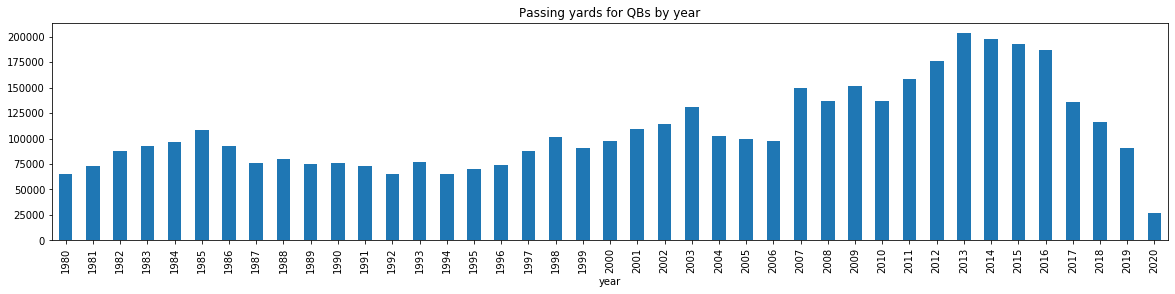

In [99]:
plt.figure(figsize=(20,4))
dfConfGroupedPass.groupby('year').sum()['pass_yds'].plot.bar(title="Passing yards for QBs by year")

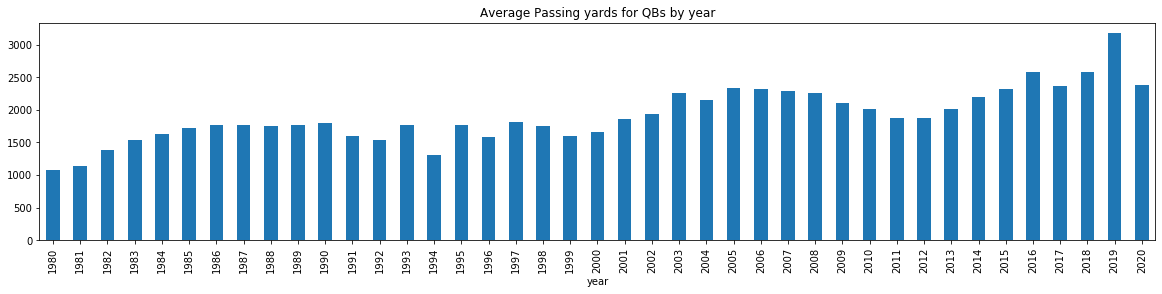

In [123]:
plt.figure(figsize=(20,4))
dfConfGroupedPass.groupby('year').mean()['avg_pass_yds'].plot.bar(title="Average Passing yards for QBs by year")

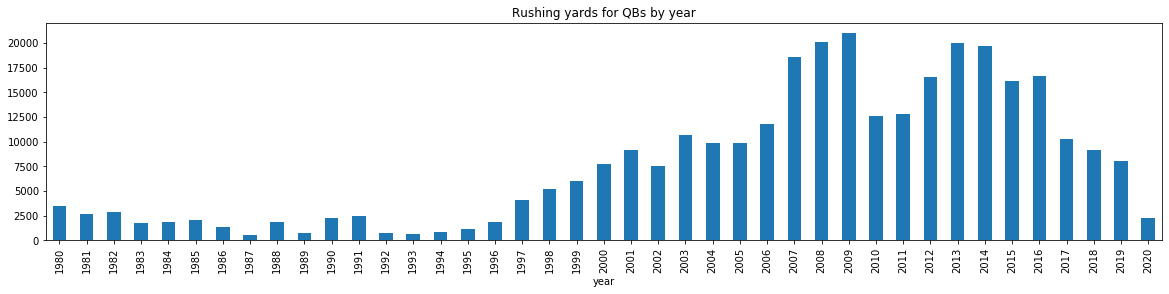

In [39]:
plt.figure(figsize=(20,4))
dfConfGroupedPass.groupby('year').sum()['rush_yds'].plot.bar(title="Rushing yards for QBs by year")

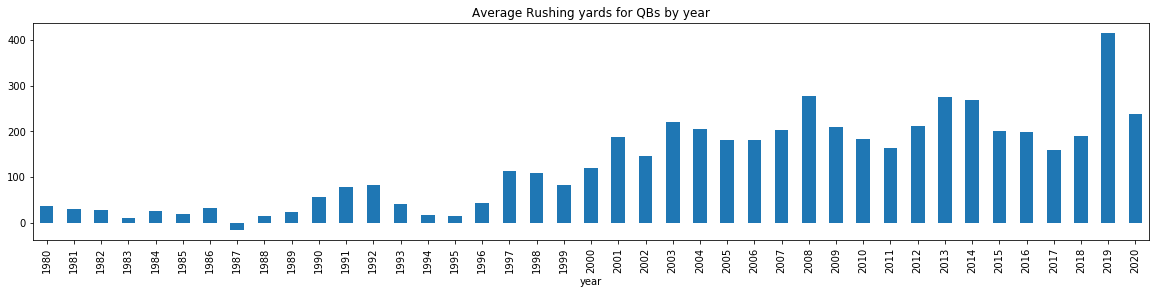

In [124]:
plt.figure(figsize=(20,4))
dfConfGroupedPass.groupby('year').mean()['avg_rush_yds'].plot.bar(title="Average Rushing yards for QBs by year")

In [128]:
#Conference total passing yards overtime

dfConfGroupedOffSkill = dfOffSkill.groupby(["conf_abbr","pos", "year"]).agg(
    rush_att=('rush_att', 'sum'),
    rush_yds=('rush_yds', 'sum'),
    avg_rush_yds=('rush_yds', np.mean),
    rush_td=('rush_td', 'sum'),
    rec=('rec', 'sum'),
    rec_yds=('rec_yds', 'sum'),
    avg_rec_yds=('rec_yds', np.mean),
    rec_td=('rec_td', 'sum')
).reset_index()
dfConfGroupedOffSkill = dfConfGroupedOffSkill.drop(dfConfGroupedOffSkill[dfConfGroupedOffSkill.year < 1980].index)

In [129]:
dfConfGroupedOffSkill

,conf_abbr,pos,year,rush_att,rush_yds,avg_rush_yds,rush_td,rec,rec_yds,avg_rec_yds,rec_td
19,ACC,FB,2013,21.0,70.0,17.500000,0.0,35.0,274.0,68.500000,3.0
20,ACC,FB,2014,33.0,140.0,46.666667,0.0,31.0,327.0,109.000000,2.0
21,ACC,FB,2015,158.0,649.0,216.333333,8.0,28.0,301.0,100.333333,4.0
22,ACC,FB,2016,81.0,374.0,124.666667,6.0,27.0,326.0,108.666667,6.0
23,ACC,HB,2017,27.0,182.0,182.000000,1.0,85.0,895.0,895.000000,5.0
...,...,...,...,...,...,...,...,...,...,...,...
2212,WAC,WR,2008,73.0,487.0,69.571429,8.0,338.0,4778.0,398.166667,35.0
2213,WAC,WR,2009,31.0,211.0,35.166667,3.0,542.0,7697.0,699.727273,66.0
2214,WAC,WR,2010,61.0,426.0,60.857143,4.0,641.0,9441.0,786.750000,74.0
2215,WAC,WR,2011,49.0,260.0,28.888889,3.0,707.0,9556.0,682.571429,62.0


In [135]:
rbConfGroupedOffSkill = dfConfGroupedOffSkill[dfConfGroupedOffSkill["pos"].isin(["HB", "RB"])]
rbConfGroupedOffSkill

,conf_abbr,pos,year,rush_att,rush_yds,avg_rush_yds,rush_td,rec,rec_yds,avg_rec_yds,rec_td
23,ACC,HB,2017,27.0,182.0,182.000000,1.0,85.0,895.0,895.000000,5.0
49,ACC,RB,1980,1087.0,4762.0,366.307692,35.0,68.0,629.0,57.181818,6.0
50,ACC,RB,1981,1267.0,6517.0,501.307692,57.0,69.0,593.0,53.909091,3.0
51,ACC,RB,1982,1764.0,8570.0,451.052632,78.0,145.0,1412.0,94.133333,7.0
52,ACC,RB,1983,1916.0,9506.0,559.176471,69.0,199.0,2065.0,121.470588,7.0
...,...,...,...,...,...,...,...,...,...,...,...
2115,WAC,RB,2008,405.0,2195.0,439.000000,23.0,43.0,570.0,142.500000,5.0
2116,WAC,RB,2009,814.0,4976.0,710.857143,57.0,88.0,964.0,160.666667,8.0
2117,WAC,RB,2010,452.0,3063.0,765.750000,36.0,70.0,834.0,208.500000,3.0
2118,WAC,RB,2011,583.0,3584.0,716.800000,39.0,63.0,554.0,110.800000,7.0


In [141]:
recConfGroupedOffSkill = dfConfGroupedOffSkill[dfConfGroupedOffSkill["pos"].isin(["WR"])]
recConfGroupedOffSkill

,conf_abbr,pos,year,rush_att,rush_yds,avg_rush_yds,rush_td,rec,rec_yds,avg_rec_yds,rec_td
165,ACC,WR,1980,16.0,39.0,6.500000,0.0,216.0,3251.0,406.375000,32.0
166,ACC,WR,1981,64.0,283.0,40.428571,1.0,269.0,4647.0,422.454545,40.0
167,ACC,WR,1982,13.0,67.0,22.333333,1.0,154.0,2779.0,555.800000,28.0
168,ACC,WR,1983,19.0,196.0,32.666667,1.0,113.0,1797.0,256.714286,16.0
169,ACC,WR,1984,17.0,86.0,14.333333,0.0,159.0,2845.0,284.500000,26.0
...,...,...,...,...,...,...,...,...,...,...,...
2212,WAC,WR,2008,73.0,487.0,69.571429,8.0,338.0,4778.0,398.166667,35.0
2213,WAC,WR,2009,31.0,211.0,35.166667,3.0,542.0,7697.0,699.727273,66.0
2214,WAC,WR,2010,61.0,426.0,60.857143,4.0,641.0,9441.0,786.750000,74.0
2215,WAC,WR,2011,49.0,260.0,28.888889,3.0,707.0,9556.0,682.571429,62.0


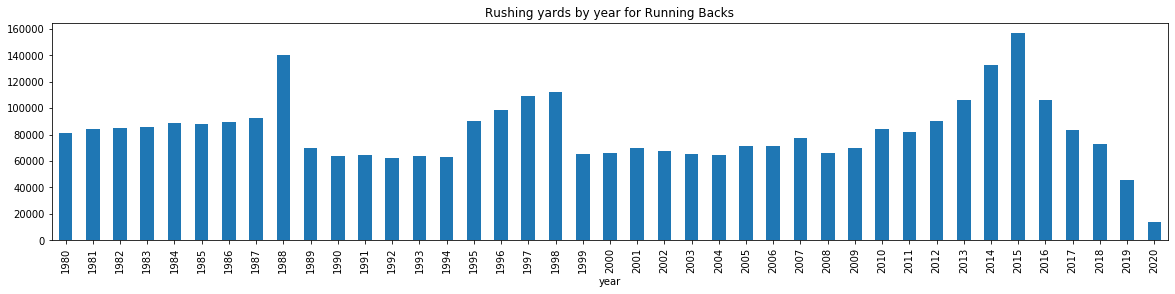

In [145]:
plt.figure(figsize=(20,4))
rbConfGroupedOffSkill.groupby('year').sum()['rush_yds'].plot.bar(title="Rushing yards by year for Running Backs")

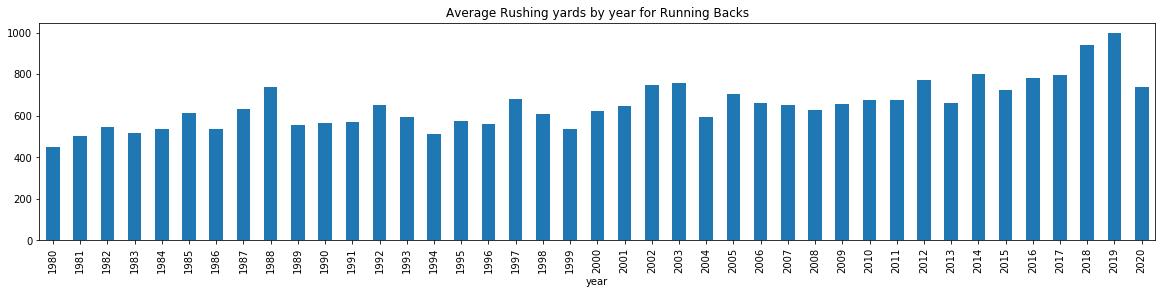

In [146]:
plt.figure(figsize=(20,4))
rbConfGroupedOffSkill.groupby('year').mean()['avg_rush_yds'].plot.bar(title="Average Rushing yards by year for Running Backs")

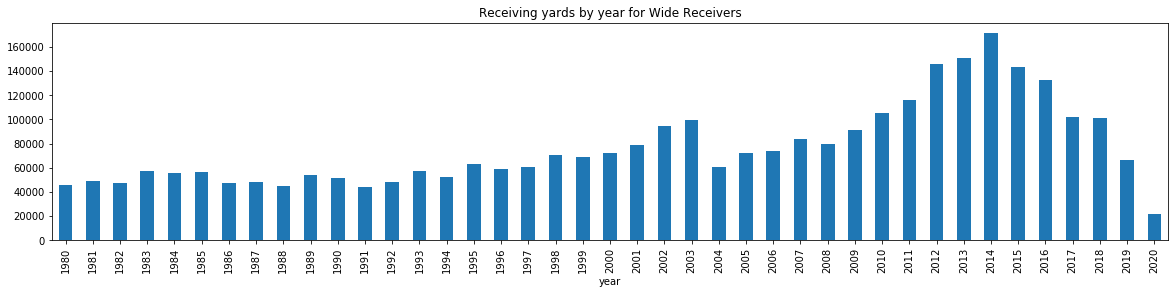

In [144]:
plt.figure(figsize=(20,4))
recConfGroupedOffSkill.groupby('year').sum()['rec_yds'].plot.bar(title="Receiving yards by year for Wide Receivers")

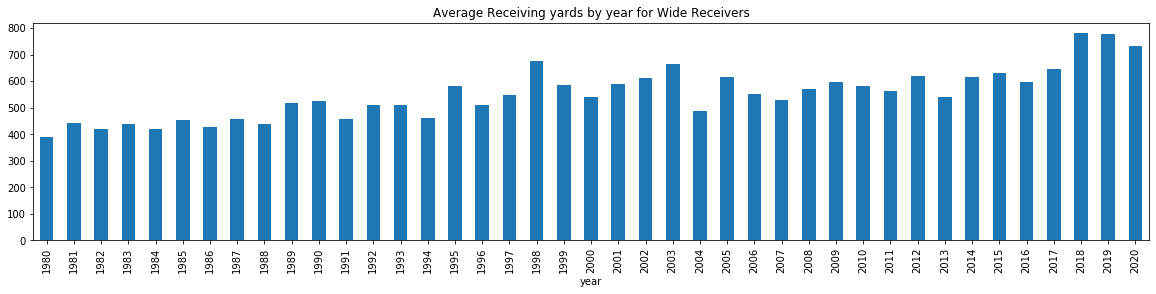

In [147]:
plt.figure(figsize=(20,4))
recConfGroupedOffSkill.groupby('year').mean()['avg_rec_yds'].plot.bar(title="Average Receiving yards by year for Wide Receivers")

In [43]:
joinCareerPass["conf_abbr"].unique()

array(['ACC', 'SEC', 'Pac-10', 'Big Ten', 'CUSA', 'MWC', 'SWC', 'Pac-12',
       'Ind', 'Big 12', 'MAC', 'Big East', 'American', 'WAC', 'Sun Belt',
       'Big West', 'PCAA', 'MVC', 'Southland', 'Big 8', 'Ivy', 'Pac-8'],
      dtype=object)

## Strength of Conference Analysis

In [44]:
#Count of drafted QBs by conference
passConf = joinCareerPass.groupby("conf_abbr").count()["draftedBy"].reset_index()
passConf["percentTotal"] = (passConf["draftedBy"]  / passConf["draftedBy"].sum())
passConf["percentTotal"] = pd.Series(["{0:.2f}%".format(val * 100) for val in passConf["percentTotal"]], index = passConf.index)
passConf.sort_values('draftedBy', ascending=False).head(15)

,conf_abbr,draftedBy,percentTotal
17,SEC,84,16.00%
5,Big Ten,69,13.14%
14,Pac-10,66,12.57%
0,ACC,49,9.33%
8,Ind,48,9.14%
2,Big 12,35,6.67%
21,WAC,29,5.52%
4,Big East,24,4.57%
7,CUSA,22,4.19%
15,Pac-12,19,3.62%


In [45]:
#Count of drafted offensive skill position players by conference
OffSkillConf = joinCareerOffSkill.groupby("conf_abbr").count()["draftedBy"].reset_index()
OffSkillConf["percentTotal"] = (OffSkillConf["draftedBy"]  / OffSkillConf["draftedBy"].sum())
OffSkillConf["percentTotal"] = pd.Series(["{0:.2f}%".format(val * 100) for val in OffSkillConf["percentTotal"]], index = OffSkillConf.index)
OffSkillConf.sort_values('draftedBy',ascending=False).head(15)

,conf_abbr,draftedBy,percentTotal
17,SEC,516,18.18%
5,Big Ten,363,12.79%
0,ACC,273,9.62%
14,Pac-10,266,9.37%
8,Ind,254,8.95%
2,Big 12,221,7.79%
4,Big East,146,5.14%
23,WAC,138,4.86%
3,Big 8,124,4.37%
19,SWC,104,3.66%


In [46]:
#Count of drafted defensive skill position players by conference
defSkillConf = joinCareerDef.groupby("conf_abbr").count()["draftedBy"].reset_index()
defSkillConf["percentTotal"] = (defSkillConf["draftedBy"]  / defSkillConf["draftedBy"].sum())
defSkillConf["percentTotal"] = pd.Series(["{0:.2f}%".format(val * 100) for val in defSkillConf["percentTotal"]], index = defSkillConf.index)
defSkillConf.sort_values('draftedBy', ascending=False).head(15)

,conf_abbr,draftedBy,percentTotal
17,SEC,624,20.06%
0,ACC,433,13.92%
5,Big Ten,430,13.82%
14,Pac-10,277,8.90%
2,Big 12,255,8.20%
15,Pac-12,161,5.18%
4,Big East,156,5.01%
8,Ind,154,4.95%
21,WAC,108,3.47%
12,MWC,95,3.05%


In [47]:
#Count of drafted QBs by conference
passConf = joinCareerPass.groupby(["conf_abbr","round"]).count()["draftedBy"].reset_index()
passConf = passConf[passConf["conf_abbr"] == "SEC"]
passConf["percentTotal"] = (passConf["draftedBy"]  / passConf["draftedBy"].sum())
passConf["percentTotal"] = pd.Series(["{0:.2f}%".format(val * 100) for val in passConf["percentTotal"]], index = passConf.index)
passConf.sort_values(["round"], ascending=True).head(15)

,conf_abbr,round,draftedBy,percentTotal
87,SEC,1,32,38.10%
88,SEC,2,6,7.14%
89,SEC,3,10,11.90%
90,SEC,4,8,9.52%
91,SEC,5,10,11.90%
92,SEC,6,9,10.71%
93,SEC,7,9,10.71%


In [48]:
def confRoundDis(df, conf:str):
    '''
    Functon that takes input of a dataframe and the name of a conference as a string.
    returns a bar graph showing the count of players selected per round.
    '''
    
    congrp = df.groupby(["conf_abbr","round"]).count()["draftedBy"].reset_index()
    congrp["round"] = pd.to_numeric(congrp["round"])
    congrp = congrp[congrp["conf_abbr"] == conf]
    congrp["percentTotal"] = (congrp["draftedBy"]  / congrp["draftedBy"].sum())
    congrp["percentTotal"] = pd.Series(["{0:.2f}%".format(val * 100) for val in congrp["percentTotal"]], index = congrp.index)
    congrp.sort_values(["round"], ascending=True).head(15)
    chart = congrp.groupby('round').sum()['draftedBy'].plot.bar(title=f"Distribution of drafted players for {conf}")
    return chart

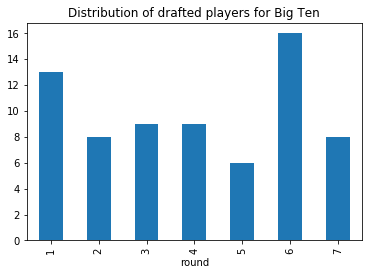

In [49]:
confRoundDis(joinCareerPass, "Big Ten")

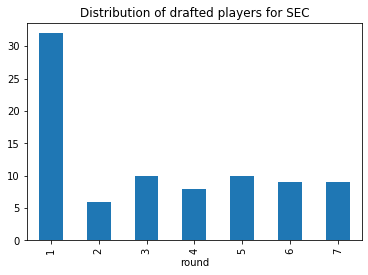

In [50]:
confRoundDis(joinCareerPass, "SEC")

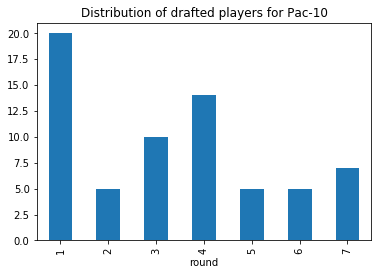

In [51]:
confRoundDis(joinCareerPass, "Pac-10")

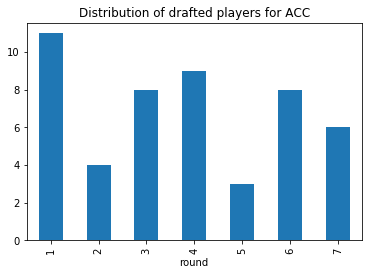

In [52]:
confRoundDis(joinCareerPass, "ACC")

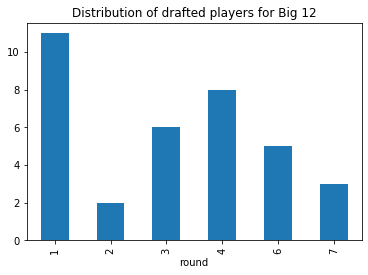

In [53]:
confRoundDis(joinCareerPass, "Big 12")

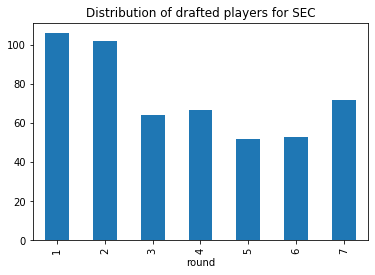

In [54]:
confRoundDis(joinCareerOffSkill, "SEC")

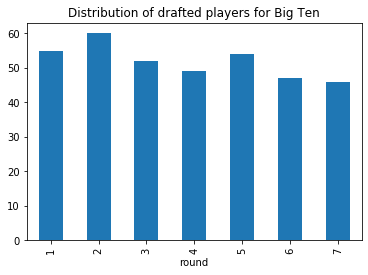

In [55]:
confRoundDis(joinCareerOffSkill, "Big Ten")

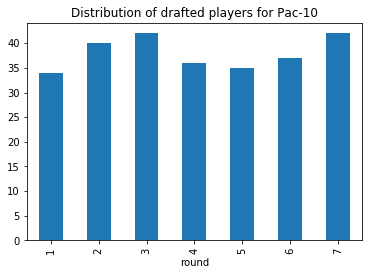

In [56]:
confRoundDis(joinCareerOffSkill, "Pac-10")

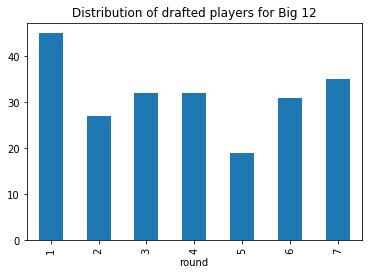

In [57]:
confRoundDis(joinCareerOffSkill, "Big 12")

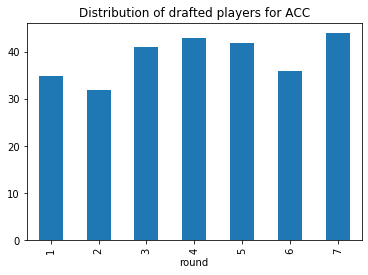

In [58]:
confRoundDis(joinCareerOffSkill, "ACC")

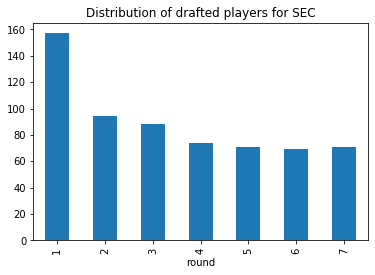

In [59]:
confRoundDis(joinCareerDef, "SEC")

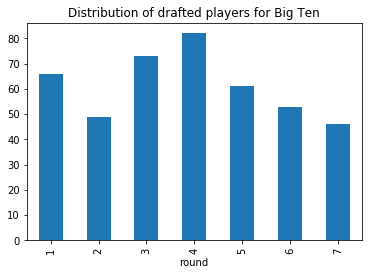

In [60]:
confRoundDis(joinCareerDef, "Big Ten")

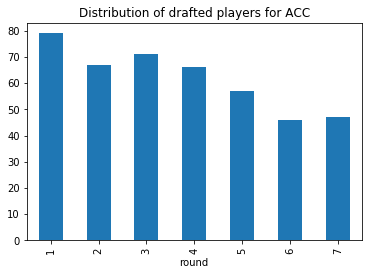

In [61]:
confRoundDis(joinCareerDef, "ACC")

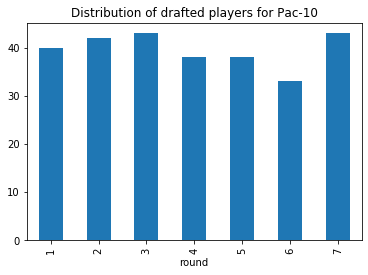

In [62]:
confRoundDis(joinCareerDef, "Pac-10")

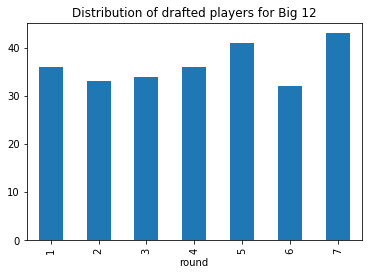

In [63]:
confRoundDis(joinCareerDef, "Big 12")